In [1]:
from langchain_core.messages import HumanMessage
from IPython.display import Image, display

from calc_agent import calculator_agent

%reload_ext autoreload
%autoreload 2

2025-02-15 07:09:34 [INFO] [tracer:<module>] - El nivel de log actual es: DEBUG


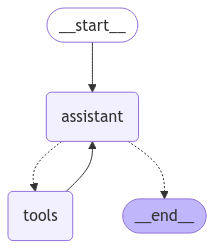

In [2]:
display(Image(calculator_agent.get_graph(xray=True).draw_mermaid_png()))

In [3]:
# Specify a thread
config = {"configurable": {"thread_id": "1"}}

In [4]:
# Specify an input
messages = [HumanMessage(content="Add 3 and 4.")]

# Run
messages = calculator_agent.invoke({"messages": messages}, config)
for m in messages['messages']:
    m.pretty_print()

Python REPL can execute arbitrary code. Use with caution.


================================ Human Message =================================

Add 3 and 4.
================================== Ai Message ==================================
Tool Calls:
  add (call_IrySMNtYNKwF7d4hyo6NPZWb)
 Call ID: call_IrySMNtYNKwF7d4hyo6NPZWb
  Args:
    a: 3
    b: 4
================================= Tool Message =================================
Name: add

7

================================== Ai Message ==================================

The result of adding 3 and 4 is 7.


In [ ]:
messages = [HumanMessage(content="Multiply that by 2.")]

# Run
messages = calculator_agent.invoke({"messages": messages}, config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 3 and 4.
================================== Ai Message ==================================
Tool Calls:
  add (call_qt2v5X0yuZ9gq9ndnFsdDNWi)
 Call ID: call_qt2v5X0yuZ9gq9ndnFsdDNWi
  Args:
    a: 3
    b: 4
================================= Tool Message =================================
Name: add

7

================================== Ai Message ==================================

The sum of 3 and 4 is 7.
================================ Human Message =================================

Multiply that by 2.
================================== Ai Message ==================================
Tool Calls:
  multiply (call_BB4Z76KKqe2KU7ONhba8EOYv)
 Call ID: call_BB4Z76KKqe2KU7ONhba8EOYv
  Args:
    a: 7
    b: 2
================================= Tool Message =================================
Name: multiply

14

================================== Ai Message ==================================

When you multiply 7

In [ ]:
calculator_agent.get_state(config).values['execution_environment']

[{'result': '14\n'}, {}]

In [ ]:
messages = [HumanMessage(content="Add 2 and 3, then multiply by 4 and compute the result squared.")]

messages = calculator_agent.invoke({"messages": messages}, config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 3 and 4.
================================== Ai Message ==================================
Tool Calls:
  add (call_qt2v5X0yuZ9gq9ndnFsdDNWi)
 Call ID: call_qt2v5X0yuZ9gq9ndnFsdDNWi
  Args:
    a: 3
    b: 4
================================= Tool Message =================================
Name: add

7

================================== Ai Message ==================================

The sum of 3 and 4 is 7.
================================ Human Message =================================

Multiply that by 2.
================================== Ai Message ==================================
Tool Calls:
  multiply (call_BB4Z76KKqe2KU7ONhba8EOYv)
 Call ID: call_BB4Z76KKqe2KU7ONhba8EOYv
  Args:
    a: 7
    b: 2
================================= Tool Message =================================
Name: multiply

14

================================== Ai Message ==================================

When you multiply 7

In [ ]:
calculator_agent.get_state(config).values['execution_environment']

[{'result': '400\n'}, {}]

In [ ]:
messages = [HumanMessage(content="Make a random dataframe with 10 rows and 3 columns.")]

messages = calculator_agent.invoke({"messages": messages}, config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 3 and 4.
================================== Ai Message ==================================
Tool Calls:
  add (call_qt2v5X0yuZ9gq9ndnFsdDNWi)
 Call ID: call_qt2v5X0yuZ9gq9ndnFsdDNWi
  Args:
    a: 3
    b: 4
================================= Tool Message =================================
Name: add

7

================================== Ai Message ==================================

The sum of 3 and 4 is 7.
================================ Human Message =================================

Multiply that by 2.
================================== Ai Message ==================================
Tool Calls:
  multiply (call_BB4Z76KKqe2KU7ONhba8EOYv)
 Call ID: call_BB4Z76KKqe2KU7ONhba8EOYv
  Args:
    a: 7
    b: 2
================================= Tool Message =================================
Name: multiply

14

================================== Ai Message ==================================

When you multiply 7

In [ ]:
messages = [HumanMessage(content="Como se llama la variable donde has guardado el dtaframe aleatorio?.")]

messages = calculator_agent.invoke({"messages": messages}, config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 3 and 4.
================================== Ai Message ==================================
Tool Calls:
  add (call_qt2v5X0yuZ9gq9ndnFsdDNWi)
 Call ID: call_qt2v5X0yuZ9gq9ndnFsdDNWi
  Args:
    a: 3
    b: 4
================================= Tool Message =================================
Name: add

7

================================== Ai Message ==================================

The sum of 3 and 4 is 7.
================================ Human Message =================================

Multiply that by 2.
================================== Ai Message ==================================
Tool Calls:
  multiply (call_BB4Z76KKqe2KU7ONhba8EOYv)
 Call ID: call_BB4Z76KKqe2KU7ONhba8EOYv
  Args:
    a: 7
    b: 2
================================= Tool Message =================================
Name: multiply

14

================================== Ai Message ==================================

When you multiply 7

In [ ]:
calculator_agent.get_state(config).values['execution_environment'][0].keys()

dict_keys(['result', 'pd', 'np', 'data', 'df', 'result_doubled'])

In [ ]:
messages = [HumanMessage(content="Puedes imprimirla para que yo la vea?.")]

messages = calculator_agent.invoke({"messages": messages}, config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 3 and 4.
================================== Ai Message ==================================
Tool Calls:
  add (call_qt2v5X0yuZ9gq9ndnFsdDNWi)
 Call ID: call_qt2v5X0yuZ9gq9ndnFsdDNWi
  Args:
    a: 3
    b: 4
================================= Tool Message =================================
Name: add

7

================================== Ai Message ==================================

The sum of 3 and 4 is 7.
================================ Human Message =================================

Multiply that by 2.
================================== Ai Message ==================================
Tool Calls:
  multiply (call_BB4Z76KKqe2KU7ONhba8EOYv)
 Call ID: call_BB4Z76KKqe2KU7ONhba8EOYv
  Args:
    a: 7
    b: 2
================================= Tool Message =================================
Name: multiply

14

================================== Ai Message ==================================

When you multiply 7

In [ ]:
messages = [HumanMessage(content="Que hay en tu entorno de ejecucion?")]

messages = calculator_agent.invoke({"messages": messages}, config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 3 and 4.
================================== Ai Message ==================================
Tool Calls:
  add (call_qt2v5X0yuZ9gq9ndnFsdDNWi)
 Call ID: call_qt2v5X0yuZ9gq9ndnFsdDNWi
  Args:
    a: 3
    b: 4
================================= Tool Message =================================
Name: add

7

================================== Ai Message ==================================

The sum of 3 and 4 is 7.
================================ Human Message =================================

Multiply that by 2.
================================== Ai Message ==================================
Tool Calls:
  multiply (call_BB4Z76KKqe2KU7ONhba8EOYv)
 Call ID: call_BB4Z76KKqe2KU7ONhba8EOYv
  Args:
    a: 7
    b: 2
================================= Tool Message =================================
Name: multiply

14

================================== Ai Message ==================================

When you multiply 7

In [ ]:
calculator_agent.get_state(config).values['execution_environment']

[{'result': '          A         B         C\n0  0.080398  0.204031  0.295532\n1  0.997590  0.142147  1.422737\n2  1.512785  1.496729  1.841156\n3  1.040536  1.748871  1.520608\n4  1.819074  1.620006  1.106600\n5  0.439736  1.253226  1.735708\n6  0.535222  1.205413  1.775809\n7  1.822079  1.619077  0.861201\n8  0.368305  0.144012  0.260880\n9  0.488671  0.827669  1.589073\n',
  'pd': "<module 'pandas' from '/home/miguel-conde/Documents/tst_ai_ds_team/.venv/lib/python3.12/site-packages/pandas/__init__.py'>\n",
  'np': "<module 'numpy' from '/home/miguel-conde/Documents/tst_ai_ds_team/.venv/lib/python3.12/site-packages/numpy/__init__.py'>\n",
  'data': '[[0.04019879 0.1020153  0.14776594]\n [0.49879525 0.0710736  0.71136842]\n [0.75639265 0.74836466 0.92057823]\n [0.52026782 0.87443533 0.76030409]\n [0.90953689 0.81000277 0.55330014]\n [0.21986785 0.62661315 0.86785422]\n [0.26761118 0.60270643 0.88790454]\n [0.91103949 0.80953853 0.43060028]\n [0.18415271 0.07200595 0.13044024]\n [0.244

In [ ]:
calculator_agent.get_state(config).values

{'messages': [HumanMessage(content='Add 3 and 4.', additional_kwargs={}, response_metadata={}, id='49fdb4a3-376a-40ea-ab78-7e1c20794edb'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_qt2v5X0yuZ9gq9ndnFsdDNWi', 'function': {'arguments': '{"a":3,"b":4}', 'name': 'add'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 787, 'total_tokens': 805, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_50cad350e4', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-6a43e0b0-ca9b-4181-a493-f35756980fb2-0', tool_calls=[{'name': 'add', 'args': {'a': 3, 'b': 4}, 'id': 'call_qt2v5X0yuZ9gq9ndnFsdDNWi', 'type': 'tool_call'}], usage_metadata={'input_tokens': 787, 'output_tokens': 18, 'total_t

In [ ]:
events = calculator_agent.stream({"messages": [HumanMessage(content="Dime el doble de `result`")]}, config, stream_mode="values")

In [ ]:
for event in events:
    for m in event['messages']:
        m.pretty_print()

================================ Human Message =================================

Add 3 and 4.
================================== Ai Message ==================================
Tool Calls:
  add (call_qt2v5X0yuZ9gq9ndnFsdDNWi)
 Call ID: call_qt2v5X0yuZ9gq9ndnFsdDNWi
  Args:
    a: 3
    b: 4
================================= Tool Message =================================
Name: add

7

================================== Ai Message ==================================

The sum of 3 and 4 is 7.
================================ Human Message =================================

Multiply that by 2.
================================== Ai Message ==================================
Tool Calls:
  multiply (call_BB4Z76KKqe2KU7ONhba8EOYv)
 Call ID: call_BB4Z76KKqe2KU7ONhba8EOYv
  Args:
    a: 7
    b: 2
================================= Tool Message =================================
Name: multiply

14

================================== Ai Message ==================================

When you multiply 7

In [ ]:
chunks = calculator_agent.stream({"messages": [HumanMessage(content="Resume lo que hempos hablado hasta aquí")]}, config, stream_mode="updates")

In [ ]:
for chunk in calculator_agent.stream({"messages": [HumanMessage(content="Resume lo que hempos hablado hasta aquí")]}, config, stream_mode="updates"):
    for m in chunk['assistant']["messages"]:
        m.pretty_print()

================================== Ai Message ==================================

Here is a summary of our interaction:

1. **Basic Arithmetic**:
   - You asked me to add 3 and 4, which resulted in 7.
   - You then requested to multiply the result (7) by 2, resulting in 14.
   - Next, you asked to add 2 and 3, multiply the result by 4, and then square the final result, which came to 400.

2. **DataFrame Operations**:
   - I created a random DataFrame named `df` with 10 rows and 3 columns containing random values.
   - You requested to see the contents of this DataFrame, and I printed it for you.
   - When asked about my execution environment, I provided a list of the local variables, including the `df` and `result` DataFrames.
   - Finally, you requested the doubled values of the `result` DataFrame, which I computed and displayed.

This summarizes our conversation involving arithmetic operations and handling a Pandas DataFrame.


# With memory summarization

In [ ]:
from IPython.display import Image, display
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph, START
from langgraph.graph import MessagesState
from langgraph.graph import START, StateGraph

class State(MessagesState):
    summary: str

# Define a new graph
workflow = StateGraph(State)
workflow.add_node("conversation", call_model)
workflow.add_node(summarize_conversation)

# Set the entrypoint as conversation
workflow.add_edge(START, "conversation")
workflow.add_conditional_edges("conversation", should_continue)
workflow.add_edge("summarize_conversation", END)

# Compile
memory = MemorySaver()
graph = workflow.compile(checkpointer=memory)
display(Image(graph.get_graph().draw_mermaid_png()))